In [198]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [197]:
#here set up the path of your file, a priori it should be on same directory
data = pd.read_csv("ibtracs.last3years.list.v04r00.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

/Users/leobix/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,8,9,14,19,20,25,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,2016005N02187,2016,1,EP,CP,PALI,2016-01-05 06:00:00,NR,2.00000,-173.500,...,,,,,,,,,3,73
2,2016005N02187,2016,1,EP,CP,PALI,2016-01-05 09:00:00,NR,2.04500,-173.353,...,,,,,,,,,3,71
3,2016005N02187,2016,1,EP,CP,PALI,2016-01-05 12:00:00,NR,2.10000,-173.200,...,,,,,,,,,3,67
4,2016005N02187,2016,1,EP,CP,PALI,2016-01-05 15:00:00,NR,2.17750,-173.042,...,,,,,,,,,4,56


In [64]:
#allows to keep only specific columns
def select_data(data):
    return data[['SID', 'NUMBER', 'ISO_TIME', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'DIST2LAND', 'STORM_SPEED', 'STORM_DIR']]

In [ ]:
#to use in the future: computes the wind category
def sust_wind_to_cat(wind):
    # maximum sustained wind in kt (knot)
    if wind<=33: cat='TD' # <=33
    elif wind<=63.:  cat='TS'
    elif wind <=82.: cat='H1'
    elif wind <=95.: cat='H2'
    elif wind <=112.: cat='H3'
    elif wind <=136.: cat='H4'
    else: cat='H5'

    return cat

In [193]:
#allows to keep only the data between two dates to specify
def get_periodic_data(data, start ='2018-01-01',end ='2018-12-31',mincat=None,maxcat=None):
    n = len(data)
    start = datetime.strptime(start, '%Y-%m-%d')
    end = datetime.strptime(end, '%Y-%m-%d')
    times = pd.to_datetime(data['ISO_TIME'][1:n])
    ind_start = 1
    ind_end = n
    i = 1
    while times[i] < start :#or i < n:
        i+=1
    ind_start = i
    while times[i] < end :#or i < n:
        i+=1
    ind_end = i
    return data[ind_start:ind_end]

In [190]:
#allows to get the distinct ids of the storms 
def get_ids(data):
    return data.SID.unique()

In [61]:
def get_storm_track(data, storm_id = '2016005N02187', time_step = 6):
    #data.set_index("SID", inplace=True)
    return data.loc[data['SID'] == storm_id]

In [86]:
lat = np.array(storm['LAT'])
lat2 = [float(lat[i]) for i in range(len(lat))]
lon = np.array(storm['LON'])
lon2 = [float(lon[i]) for i in range(len(l))]

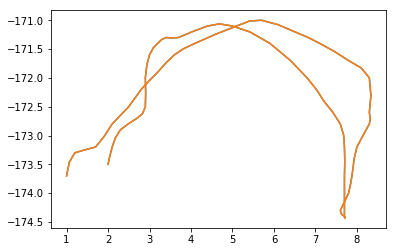

In [88]:
plt.plot(lat2, lon2)
plt.show()